## Integration of the Lennard-Jones system with a six-order Gear integrator

In [1]:
using HDF5
using PyPlot

Instructions to run a file
* Set input parameters by modifying the file `parametersgear.yaml`
* Open a terminal and type 
    `julia canonicalgear.jl`
* Type the class of thermostat
* Type the filename

Then the simulation starts!

Tests on a machine
* Intel(R) Core(TM) i7-4510U CPU @ 2.00GHz
* 8 GB RAM

Average time of simulation for parameters in .yaml file
* 15 min 

In [2]:
thermostat = "Logistic"
filename = "logisticm=2.hdf5" #The file must exist in the HDF5 folder
file = h5open("../data/$(thermostat)/HDF5/$filename", "r");

In [3]:
sim = read(file);
t = sim["t"]
E = sim["E"]
K = sim["K"]
U = sim["U"];
T = sim["T"]
i = sim["invariant"]
zeta = sim["zeta"]
nu = sim["nu"]
qatom = sim["qatom"]
patom = sim["patom"];
N = read(attrs(file)["N"])  
dt = read(attrs(file)["deltat"])  
Q = read(attrs(file)["Q"])   ##Parameter associated to the thermostat

2.0

### Data analysis

In [4]:
stepeq = 4000
mean(T[stepeq:end])

1.4999543676562141

**Heat capacity**

In [5]:
e = E[stepeq:end]; temp = T[stepeq:end];
flucte = mean((e - mean(e)).^2)
Cv = flucte/(N*mean(temp)^2)

2.3711913888108014

**Covariance**

In [6]:
k = K[stepeq:end]; u = U[stepeq:end];
cov = mean((k - mean(k)).* (u - mean(u)))/(N*mean(temp)^2)

-0.023530529368477462

**Figures**

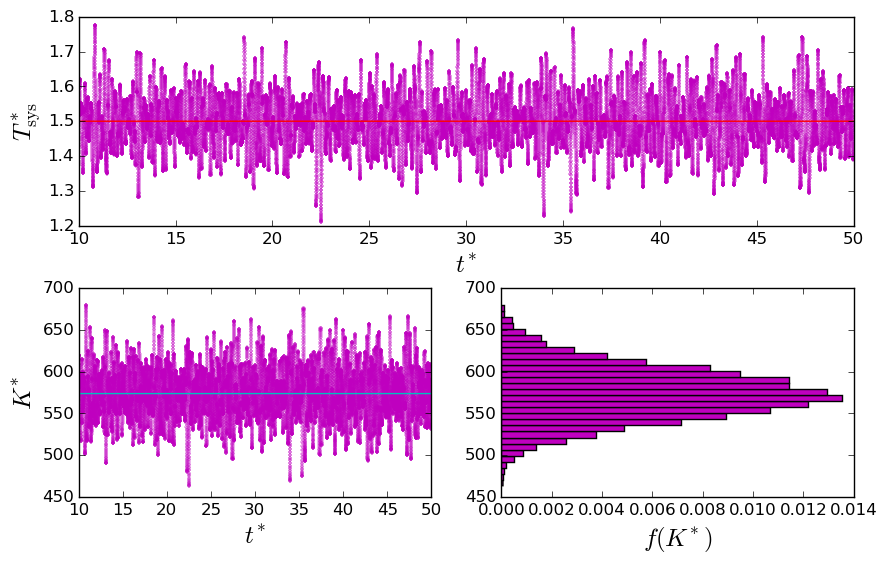

In [7]:
timered = t[stepeq:end];
meank = mean(k)*ones(timered);

if thermostat == "Logistic"
    color = "m"
    elseif thermostat == "Gaussian"
    color = "b"
    elseif thermostat == "Quartic"
    color = "g"
end

fig = plt[:figure](figsize=(10,6))
fig[:subplots_adjust](hspace=.3)

meanT = mean(T[stepeq:end])

ax1 = plt[:subplot2grid]((2,2), (0,0), colspan=2)
ax2 =  plt[:subplot2grid]((2,2), (1,0))
ax3 =  plt[:subplot2grid]((2,2), (1,1))

ax1[:plot](timered,T[stepeq:end],"$color.", alpha =0.4, markeredgewidth=0.)
ax1[:plot](timered,meanT*ones(timered),"r")
ax1[:set_xlim](10.,50.)
ax1[:set_ylim](1.2,1.8)
ax1[:set_ylabel](L"$T_{\rm sys}^*$",fontsize="18")
ax1[:set_xlabel](L"$t^*$",fontsize="18")

ax2[:plot](timered, k,"$color.", alpha =0.3, markeredgewidth=0.)
ax2[:plot](timered, meank,"c")
ax2[:set_xlim](10.,50.)
ax2[:set_ylim](450,700)
ax2[:set_ylabel](L"$K^*$",fontsize="18")
ax2[:set_xlabel](L"$t^*$",fontsize="18")

ax3[:hist](k, 30, normed =1, color = "$color",orientation = "horizontal")
ax3[:set_ylim](450,700)
ax3[:set_xlabel](L"$f(K^*)$",fontsize="18")

#plt[:savefig]("$(thermostat)15.png")
plt[:show]()

## Invariant

In [8]:
inv = i[stepeq:end];
invred = (inv - inv[1])./inv[1];

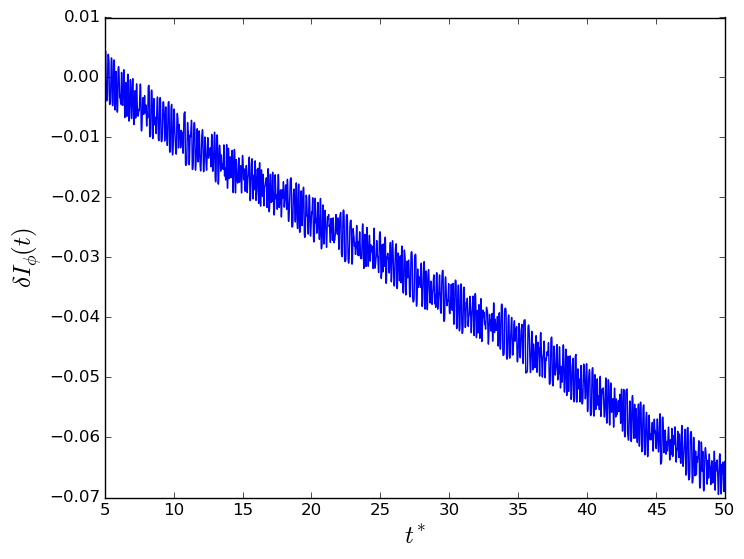

(5.0,50.0)

In [9]:
plot(timered,invred)
plt[:xlabel](L"t^*", fontsize =18)
plt[:ylabel](L"\delta I_{\phi}(t)", fontsize = 18)
plt[:xlim](5.,50.)